In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"GPU доступен: {physical_devices}")
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
else:
    print("GPU не найден, используется CPU.")

TensorFlow version: 2.18.0
GPU доступен: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [50]:
from tensorflow.keras import layers, models

def build_simple_perceptron_model(input_shape=(128, 128, 1)):
    # Определяем входное изображение
    input_size = input_shape[0] * input_shape[1]  # Общее число пикселей

    model = models.Sequential()

    # Разворачиваем изображение в вектор
    model.add(layers.Flatten(input_shape=input_shape))

    # Полносвязные слои
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))

    # Выходной слой: преобразование обратно в изображение
    model.add(layers.Dense(input_size, activation='sigmoid'))  # Выход в диапазоне [0, 1]
    model.add(layers.Reshape(input_shape))  # Возврат к форме изображения

    # Компиляция модели
    model.compile(optimizer='adam', loss='mse')
    return model

# Создание модели
image_to_image_model = build_simple_perceptron_model()
image_to_image_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16384)          │     8,404,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 128, 128, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,056,768 (65.07 MB)

 Trainable params: 17,056,768 (65.07 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
import tensorflow as tf
from glob import glob

# Функция для загрузки и обработки изображений
def load_image_pair(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=1)  # Черно-белое изображение
    img = tf.image.resize(img, [128, 128])
    img = tf.image.convert_image_dtype(img, tf.float32)  # Нормализация [0, 1]

    # Входное изображение: добавляем шум
    noisy_img = img + tf.random.normal(shape=tf.shape(img), mean=0.0, stddev=0.1)
    noisy_img = tf.clip_by_value(noisy_img, 0.0, 1.0)  # Обрезка значений в пределах [0, 1]

    return noisy_img, img

# Пути к изображениям
image_paths = glob('DATASETS/DATASET_1/TRAIN/*.png')  # Замените на ваш путь

# Создание датасета
dataset = tf.data.Dataset.from_tensor_slices(image_paths)
dataset = dataset.map(load_image_pair)
dataset = dataset.batch(8).shuffle(100).prefetch(tf.data.AUTOTUNE)


In [52]:
# Обучение модели
history = image_to_image_model.fit(
    dataset,
    epochs=50,
    steps_per_epoch=10  # Настройте в зависимости от объема данных
)



Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 60802.7266
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60714.3398
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60732.4570
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60697.9453 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60720.5938
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60725.1328
Epoch 7/50


2024-11-18 19:09:13.144559: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:13.144609: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438
2024-11-18 19:09:13.339712: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:13.339762: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60709.2031
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60712.2305
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60723.1289
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60725.3320 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60710.0469
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60707.3750
Epoch 13/50


2024-11-18 19:09:13.521900: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:13.521940: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438
2024-11-18 19:09:13.706933: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60710.2148
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60720.7617
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60709.8984
Epoch 16/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60711.4805 
Epoch 17/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60712.4023
Epoch 18/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60730.5859
Epoch 19/50


2024-11-18 19:09:13.894938: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:13.894977: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438
2024-11-18 19:09:14.080314: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:14.080363: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60714.3828
Epoch 20/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60719.7383
Epoch 21/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60726.9844
Epoch 22/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60717.8594
Epoch 23/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60713.0352
Epoch 24/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60742.2969
Epoch 25/50


2024-11-18 19:09:14.277041: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:14.277097: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438
2024-11-18 19:09:14.466754: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:14.466800: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60714.3281 
Epoch 26/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60716.2422
Epoch 27/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60720.6914
Epoch 28/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60705.4805 
Epoch 29/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60712.5312
Epoch 30/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60730.5781
Epoch 31/50


2024-11-18 19:09:14.649231: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:14.649266: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438
2024-11-18 19:09:14.838352: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:14.838391: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60719.1250 
Epoch 32/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60734.9336
Epoch 33/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60698.0078
Epoch 34/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60725.3125 
Epoch 35/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60721.8945
Epoch 36/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60691.6133
Epoch 37/50


2024-11-18 19:09:15.024798: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:15.024837: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438
2024-11-18 19:09:15.209289: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:15.209326: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60727.3594 
Epoch 38/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60703.9375
Epoch 39/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60733.0898
Epoch 40/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60713.6172 
Epoch 41/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60742.0469
Epoch 42/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60705.4258
Epoch 43/50


2024-11-18 19:09:15.397884: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:15.397975: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438
2024-11-18 19:09:15.589822: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:15.589875: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60709.1133 
Epoch 44/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60731.1133
Epoch 45/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60711.9297
Epoch 46/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60696.6602
Epoch 47/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60707.8047
Epoch 48/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60758.6914

2024-11-18 19:09:15.795513: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:15.795549: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60732.6680
Epoch 49/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60698.0938 
Epoch 50/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60742.3828


2024-11-18 19:09:15.998779: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8832949463744619260
2024-11-18 19:09:15.998827: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7584246610231567438


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


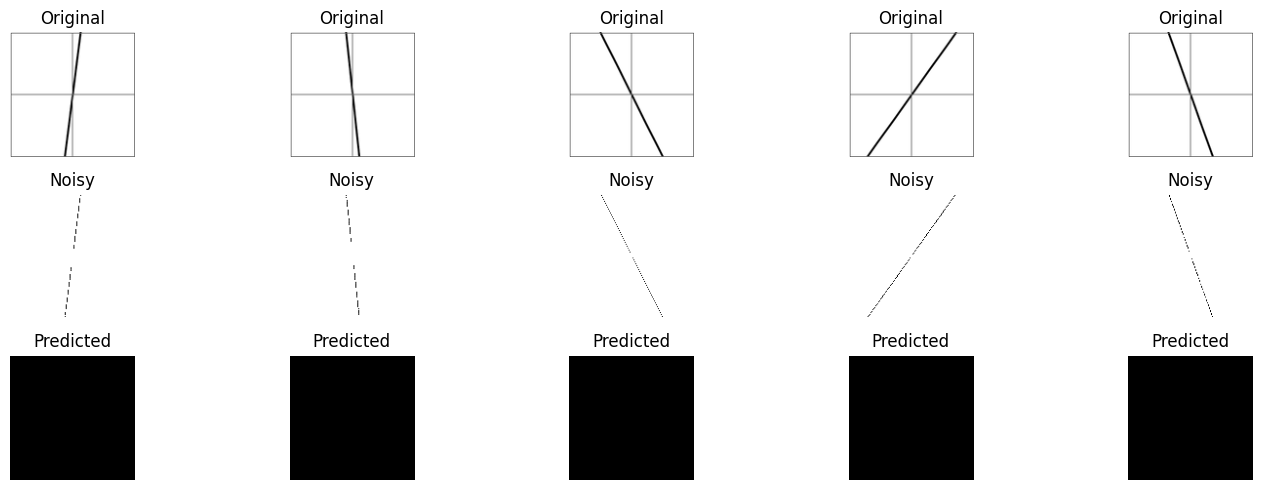

In [54]:
import matplotlib.pyplot as plt

def visualize_results(model, dataset, num_images=5):
    for noisy_imgs, clean_imgs in dataset.take(1):
        predicted_imgs = model.predict(noisy_imgs)
        
        plt.figure(figsize=(15, 5))
        for i in range(num_images):
            # Исходное изображение
            plt.subplot(3, num_images, i + 1)
            plt.imshow(clean_imgs[i, :, :, 0], cmap='gray')
            plt.title("Original")
            plt.axis("off")

            # Зашумленное изображение
            plt.subplot(3, num_images, num_images + i + 1)
            plt.imshow(noisy_imgs[i, :, :, 0], cmap='gray')
            plt.title("Noisy")
            plt.axis("off")

            # Предсказанное изображение
            plt.subplot(3, num_images, 2 * num_images + i + 1)
            plt.imshow(predicted_imgs[i, :, :, 0], cmap='gray')
            plt.title("Predicted")
            plt.axis("off")
        
        plt.tight_layout()
        plt.show()

# Визуализация
visualize_results(image_to_image_model, dataset)
